In [34]:
# Importing the IMDB dataset from TensorFlow
from tensorflow.keras.datasets import imdb

# Loading the dataset with only the top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Displaying the first training sample
X_train[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [35]:
# Accessing the first label in the training dataset
y_train[0]


1

In [36]:
# Finding the maximum word index in the dataset
max([max(seq) for seq in X_train])


9999

In [45]:
# Converting encoded reviews back to text
word_to_id = imdb.get_word_index()

# Creating a reverse mapping from indices to words
id_to_word = {index: word for word, index in word_to_id.items()}

# Decoding the first review by mapping indices to words
review_text = " ".join([id_to_word.get(i - 3, "?") for i in X_train[0]])


In [46]:
# Data preprocessing
# Converting integer sequences into multi-hot encoded representations
import numpy as np

def multi_hot_encode(sequences, vocab_size=10000):
    encoded_matrix = np.zeros((len(sequences), vocab_size))
    for idx, seq in enumerate(sequences):
        for token in seq:
            encoded_matrix[idx, token] = 1.
    return encoded_matrix

X_train_encoded = multi_hot_encode(X_train)
X_test_encoded = multi_hot_encode(X_test)


In [47]:
# Displaying the first training sample after multi-hot encoding
X_train_encoded[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [48]:
# Converting labels to float32 arrays
Y_train = np.asarray(y_train).astype("float32")
Y_test = np.asarray(y_test).astype("float32")


In [49]:
# Constructing the neural network
# Using 3 layers with 64 nodes each and "tanh" as the activation function
# "tanh" is chosen over ReLU since it handles both positive and negative values effectively
# L2 regularization is applied to prevent overfitting
# Dropout layers are added to enhance generalization

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

neural_net = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


In [52]:
# Compiling the neural network
# Using RMSprop optimizer for adaptive learning
# Mean Squared Error (MSE) as the loss function
# Tracking accuracy as the evaluation metric

neural_net.compile(optimizer="rmsprop",
                   loss="mse",
                   metrics=["accuracy"])


In [53]:
# Validating the approach
# Creating a validation set by splitting the training data

X_val = X_train_encoded[:10000]
X_train_partial = X_train_encoded[10000:]
Y_val = Y_train[:10000]
Y_train_partial = Y_train[10000:]


In [54]:
# Training the neural network
# Using a batch size of 512 and training for 20 epochs
# Validating with the previously set aside validation set

training_history = neural_net.fit(
    X_train_partial,
    Y_train_partial,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, Y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6446 - loss: 0.6727 - val_accuracy: 0.8642 - val_loss: 0.2693
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8581 - loss: 0.2417 - val_accuracy: 0.8676 - val_loss: 0.1699
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8859 - loss: 0.1514 - val_accuracy: 0.8801 - val_loss: 0.1402
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8924 - loss: 0.1301 - val_accuracy: 0.8341 - val_loss: 0.1673
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8997 - loss: 0.1206 - val_accuracy: 0.7886 - val_loss: 0.1995
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8966 - loss: 0.1187 - val_accuracy: 0.8603 - val_loss: 0.1431
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9122 - loss: 0.1081 - val_accuracy: 0.8744 - val_loss: 0.1284
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9194 - loss: 0.0996 - val_accuracy: 0.8567 - v

In [55]:
# Extracting training history data
training_history_dict = training_history.history

# Displaying available keys in the history dictionary
training_history_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

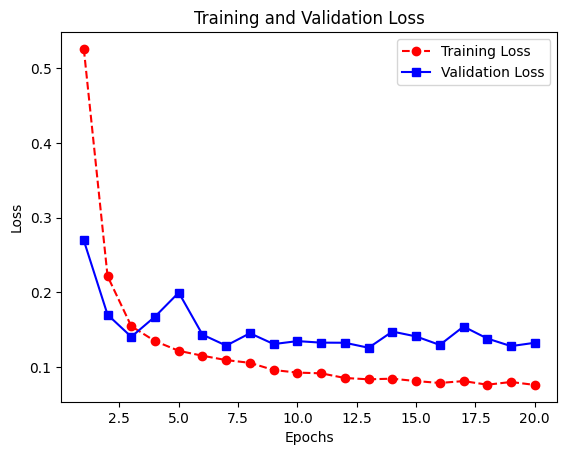

In [56]:
# Importing the required library for visualization
import matplotlib.pyplot as plt

# Extracting training history
history_dict = training_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# Plotting training loss with a dashed red line and markers
plt.plot(epochs, loss_values, "ro--", label="Training Loss")

# Plotting validation loss with a solid blue line
plt.plot(epochs, val_loss_values, "bs-", label="Validation Loss")

# Adding title and labels
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Displaying legend
plt.legend()

# Showing the plot
plt.show()


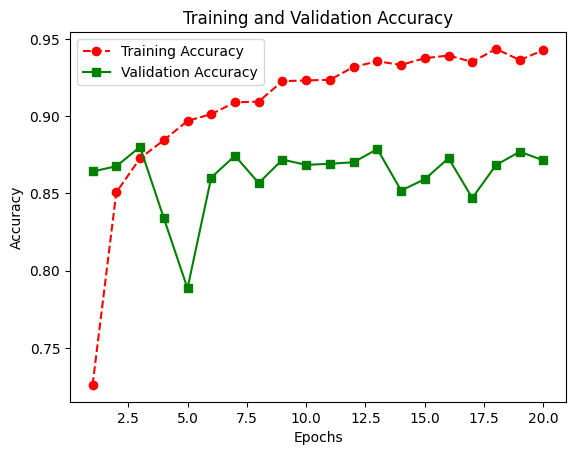

In [57]:
# Clearing the previous plot
plt.clf()

# Extracting accuracy values
acc = training_history_dict["accuracy"]
val_acc = training_history_dict["val_accuracy"]

# Plotting training accuracy with a red dashed line and circle markers
plt.plot(epochs, acc, "ro--", label="Training Accuracy")

# Plotting validation accuracy with a solid green line and square markers
plt.plot(epochs, val_acc, "gs-", label="Validation Accuracy")

# Adding title and labels
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Displaying legend
plt.legend()

# Showing the plot
plt.show()


In [58]:
# Evaluating the trained model on the test dataset
test_results = neural_net.evaluate(X_test_encoded, Y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8657 - loss: 0.1382


In [59]:
# Displaying the test evaluation results
test_results


[0.13651978969573975, 0.8685200214385986]

In [60]:
# Observing model stability with more nodes
# Retraining a new model with multiple layers and MSE loss function

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Defining a new model with dropout layers
new_model = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model with Adam optimizer
new_model.compile(optimizer="adam",
                  loss="mse",
                  metrics=["accuracy"])

# Training the model for 4 epochs with a batch size of 512
new_model.fit(X_train_encoded, Y_train, epochs=4, batch_size=512)

# Evaluating the model on the test set
new_results = new_model.evaluate(X_test_encoded, Y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6882 - loss: 0.5441
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8960 - loss: 0.1525
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9041 - loss: 0.1444
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9099 - loss: 0.1423
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8723 - loss: 0.1624


In [64]:
# Displaying the test evaluation results
new_results


[0.16125860810279846, 0.8752400279045105]